In [1]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [26]:
df = pd.read_csv('./北區所友＿扣掉大怪獸_20160901_20170831.csv') #df for dataframe
df.head() #get a glimpse
# df.columns 

,﻿時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
0,2016/09,北區,行政大樓,主迴路,行政,10034.91
1,2016/10,北區,行政大樓,主迴路,行政,8487.64
2,2016/11,北區,行政大樓,主迴路,行政,1920.39
3,2016/12,北區,行政大樓,主迴路,行政,125.61
4,2017/01,北區,行政大樓,主迴路,行政,172.42


In [27]:
#用pd.describe()了解資料
#newdf 是只看時間與用電量的 資料子集
newdf= df[['﻿時  間','用電量(單位:度)']]
print(newdf.describe()) 
print(newdf.shape) #How many data?


          用電量(單位:度)
count  7.200000e+02
mean   8.243257e+35
std    1.578737e+37
min    0.000000e+00
25%    1.446365e+03
50%    8.231860e+03
75%    3.596567e+04
max    3.389700e+38
(720, 2)


### 我們發現Max大的誇張，應該有統計錯誤

In [30]:
df1 = df #在df1實驗，不會搞雜原來的資料集
df1.head()
df1[df1['用電量(單位:度)'] > 100000000] #找出過大的資料

,﻿時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
62,2016/11,北區,活動中心,第一餐聽,外租,1.176367e+08
63,2016/12,北區,活動中心,第一餐聽,外租,6.677306e+09
64,2017/01,北區,活動中心,第一餐聽,外租,1.180436e+09
65,2017/02,北區,活動中心,第一餐聽,外租,4.695179e+09
66,2017/03,北區,活動中心,第一餐聽,外租,1.495147e+09
676,2017/01,北區,第二餐廳,3F員工餐廳L燈力,外租,2.545445e+38
678,2017/03,北區,第二餐廳,3F員工餐廳L燈力,外租,3.389700e+38


In [52]:
#df1 = df1.drop(df1.index[[675,677]]) #把676,678拿掉
df2 = df[df1['用電量(單位:度)'] > 100000] #把太大的拿掉
df2
#df2[df2['用電量(單位:度)'] > 100000000]
#df2.describe() 

,﻿時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
60,2016/09,北區,活動中心,第一餐聽,外租,9.042014e+07
61,2016/10,北區,活動中心,第一餐聽,外租,2.713285e+06
62,2016/11,北區,活動中心,第一餐聽,外租,1.176367e+08
63,2016/12,北區,活動中心,第一餐聽,外租,6.677306e+09
64,2017/01,北區,活動中心,第一餐聽,外租,1.180436e+09
65,2017/02,北區,活動中心,第一餐聽,外租,4.695179e+09
66,2017/03,北區,活動中心,第一餐聽,外租,1.495147e+09
192,2016/09,北區,機車Ｄ棚,主迴路,行政,5.014082e+05
193,2016/10,北區,機車Ｄ棚,主迴路,行政,5.301265e+05
240,2016/09,北區,綜合球館,主迴路,行政,8.777497e+05


In [40]:
df2.shape

(718, 6)

In [45]:
df2 = df2[df2['用電量(單位:度)'] > 10]
print (df2.shape)
print (718-682, ": number of rows that are 0")

(682, 6)
36 : number of rows that are 0


In [48]:
df2.describe()

,用電量(單位:度)
count,6.820000e+02
mean,2.100530e+07
std,3.205661e+08
min,2.850000e+01
25%,1.766793e+03
50%,1.000833e+04
75%,3.818949e+04
max,6.677306e+09


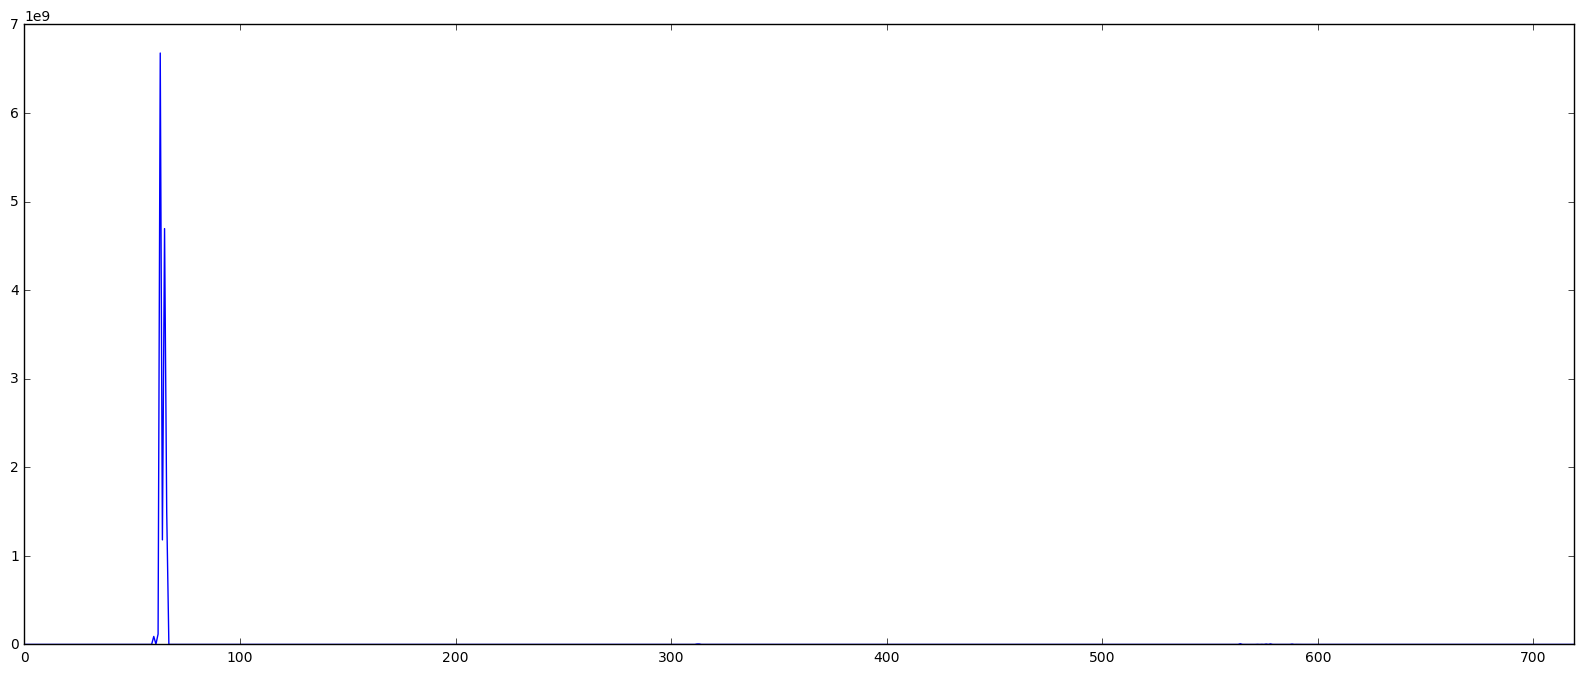

In [49]:
df2['用電量(單位:度)'].plot.line()
#matplotlib.pyplot.title('Electricity usage per 15 min (In 2 weeks, unit: degree)')

In [ ]:
df3 = df2.groupby()

In [49]:
#把欄名改成英文
newdf = newdf.rename(index=str, columns={'﻿時  間':"Date_Time",'用電量(單位:度)':"Usage"}) 
newdf.columns

Index(['Date_Time', 'Usage'], dtype='object')

In [50]:
df_hr = newdf.Date_Time.str[-5:-3]
df_min = newdf.Date_Time.str[-2:]
# print (df_hr.head(),df_min.head())
newdf.loc[:,'hr'] = pd.Series(df_hr)
newdf.loc[:,'min'] = pd.Series(df_min)
newdf.Date_Time = newdf.Date_Time.str[:-6]
newdf.head()

,Date_Time,Usage,hr,min
0,2017/10/01,91.0,00,00
1,2017/10/01,92.0,00,15
2,2017/10/01,91.0,00,30
3,2017/10/01,91.0,00,45
4,2017/10/01,90.0,01,00


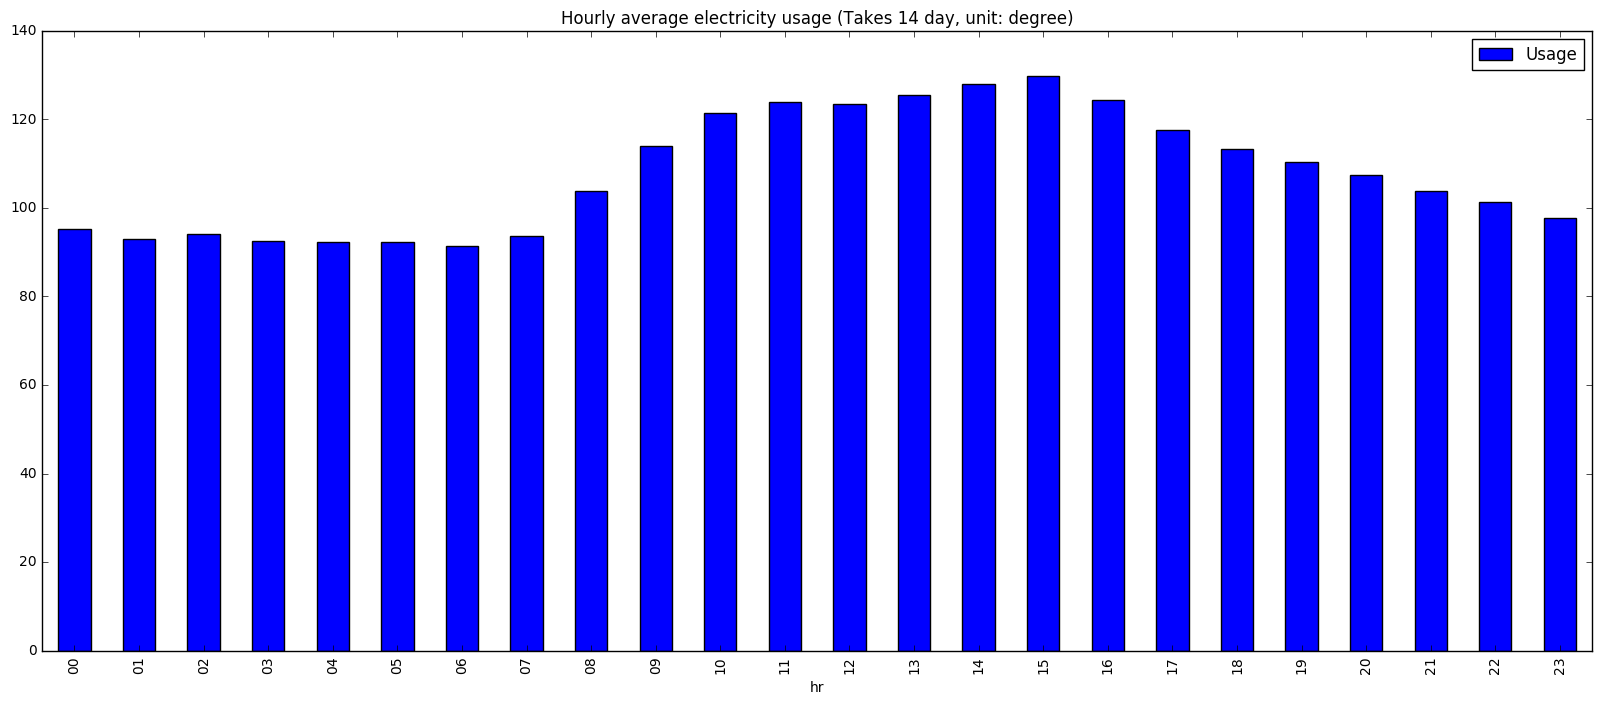

In [51]:
#科三每小時平均用電量, 範圍 10.01(Sun) - 10.14(Sat.)
dfnew_gpby = newdf.groupby(['hr'])
dfnew_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

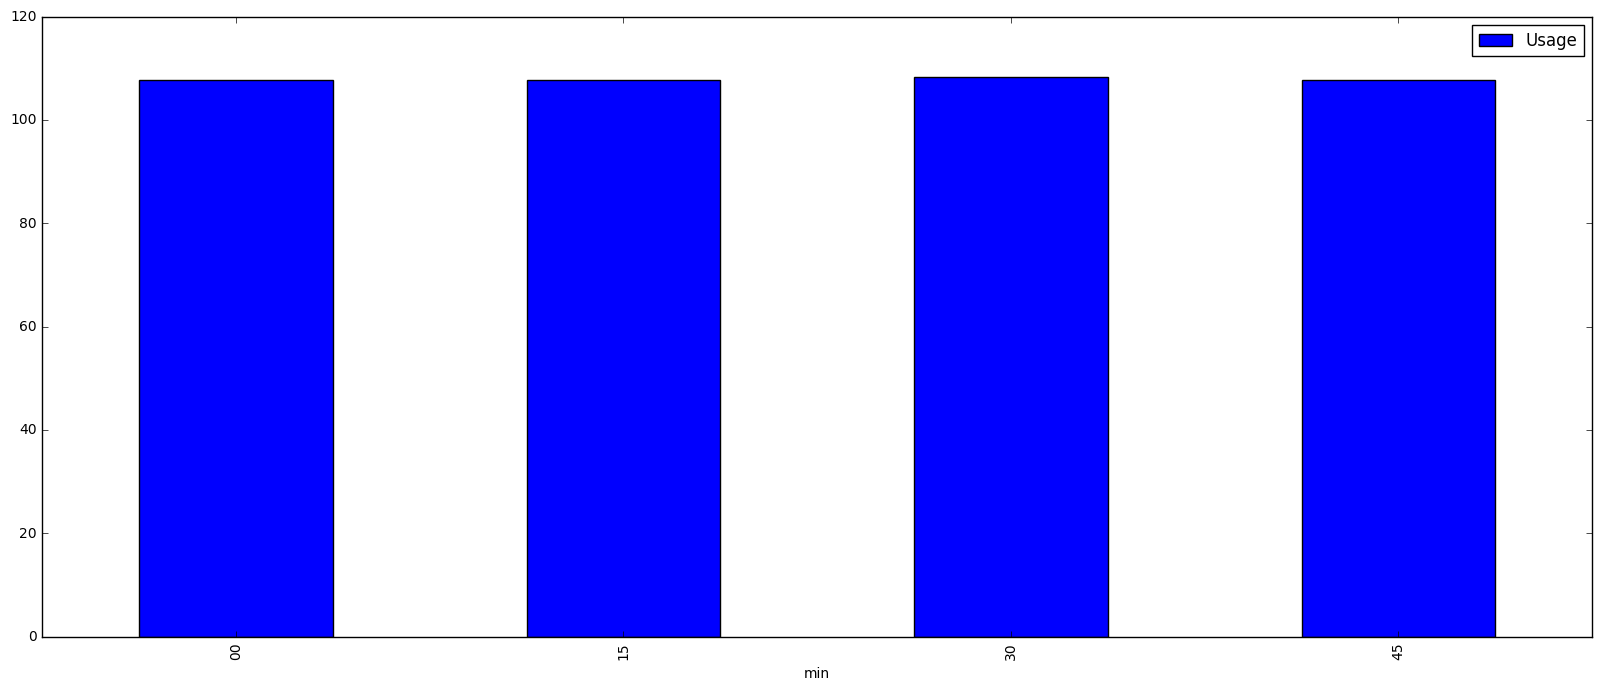

In [61]:
#科三每15分鐘用電量 
#沒什麼意義
dfnew_gpby = newdf.groupby(['min'])
dfnew_gpby.mean().plot.bar()
# matplotlib.pyplot.title('Minute average electricity usage (Takes 14 day, unit: degree)')

Date_Time
2017/10/01    Axes(0.125,0.125;0.775x0.775)
2017/10/02    Axes(0.125,0.125;0.775x0.775)
2017/10/03    Axes(0.125,0.125;0.775x0.775)
2017/10/04    Axes(0.125,0.125;0.775x0.775)
2017/10/05    Axes(0.125,0.125;0.775x0.775)
2017/10/06    Axes(0.125,0.125;0.775x0.775)
2017/10/07    Axes(0.125,0.125;0.775x0.775)
2017/10/08    Axes(0.125,0.125;0.775x0.775)
2017/10/09    Axes(0.125,0.125;0.775x0.775)
2017/10/10    Axes(0.125,0.125;0.775x0.775)
2017/10/11    Axes(0.125,0.125;0.775x0.775)
2017/10/12    Axes(0.125,0.125;0.775x0.775)
2017/10/13    Axes(0.125,0.125;0.775x0.775)
2017/10/14    Axes(0.125,0.125;0.775x0.775)
dtype: object

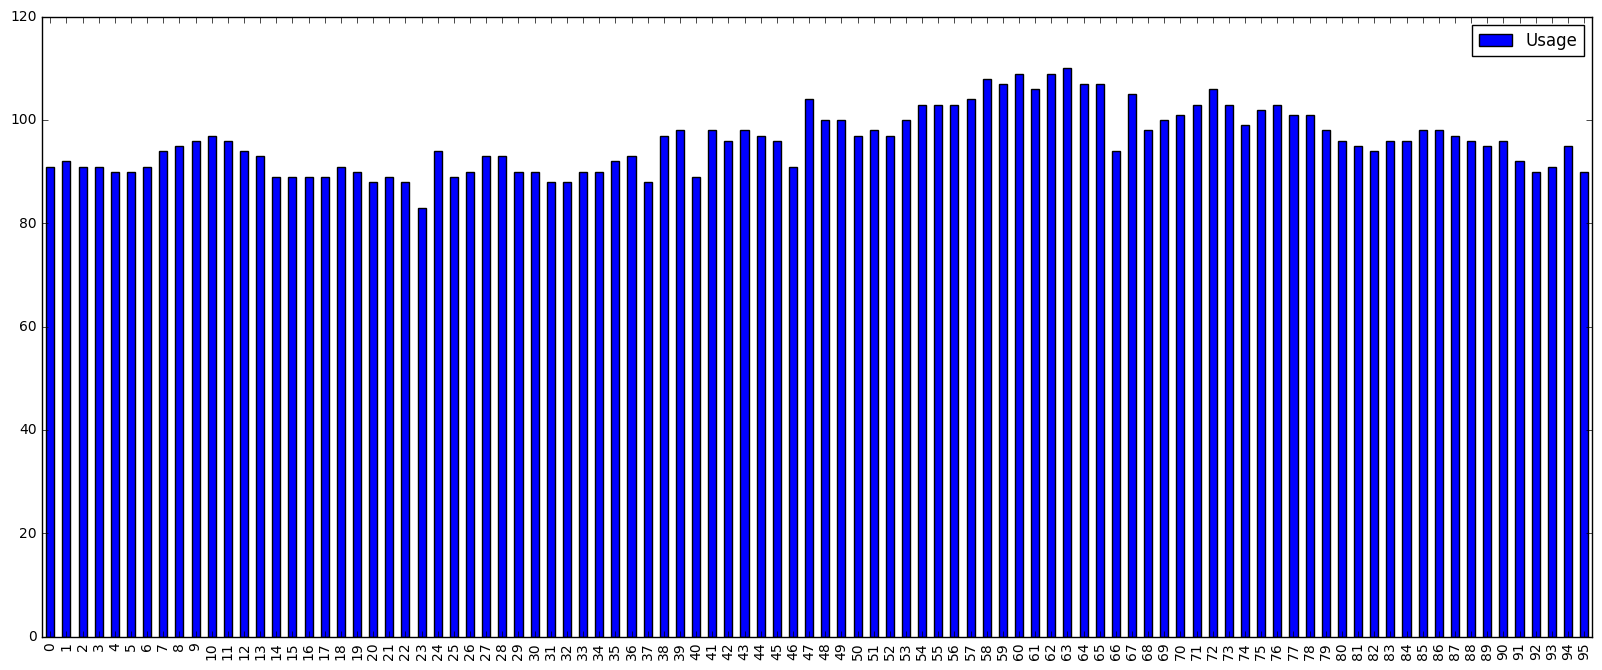

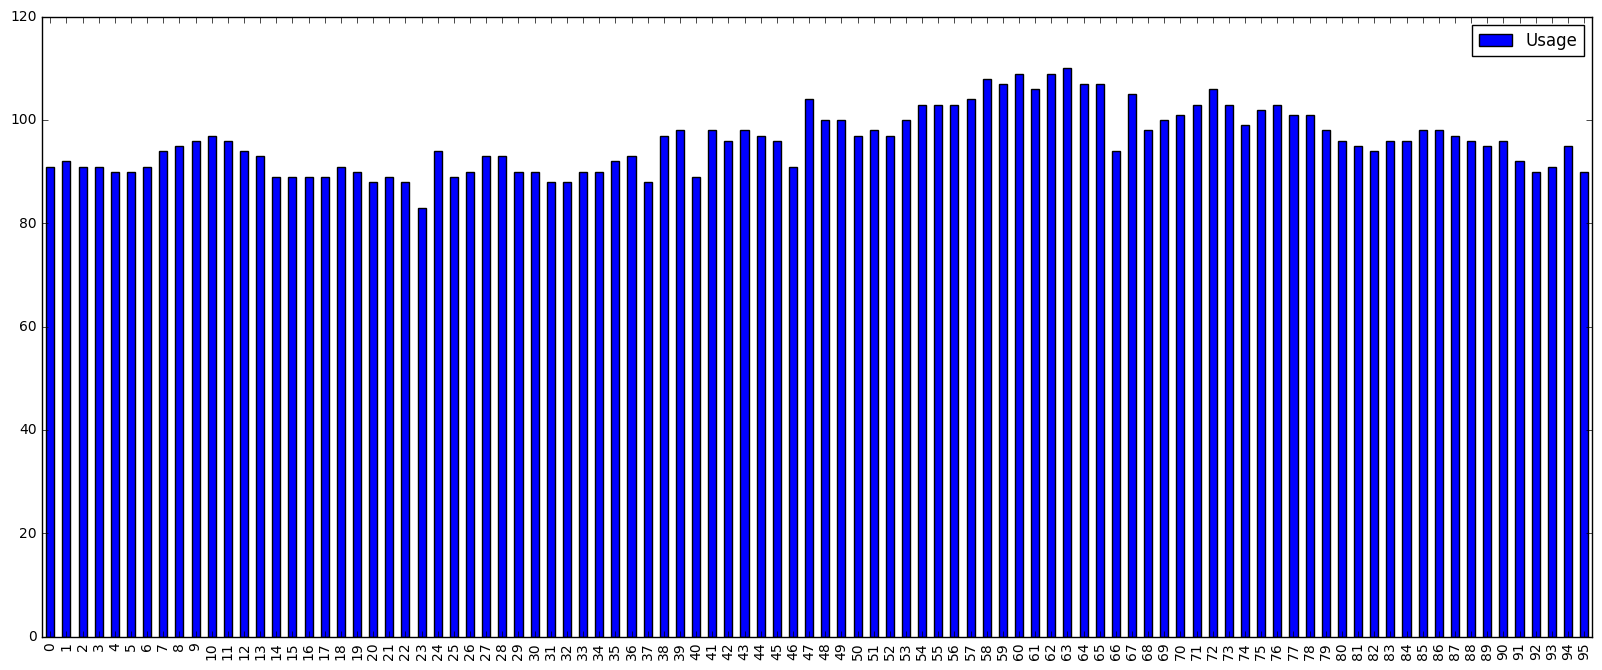

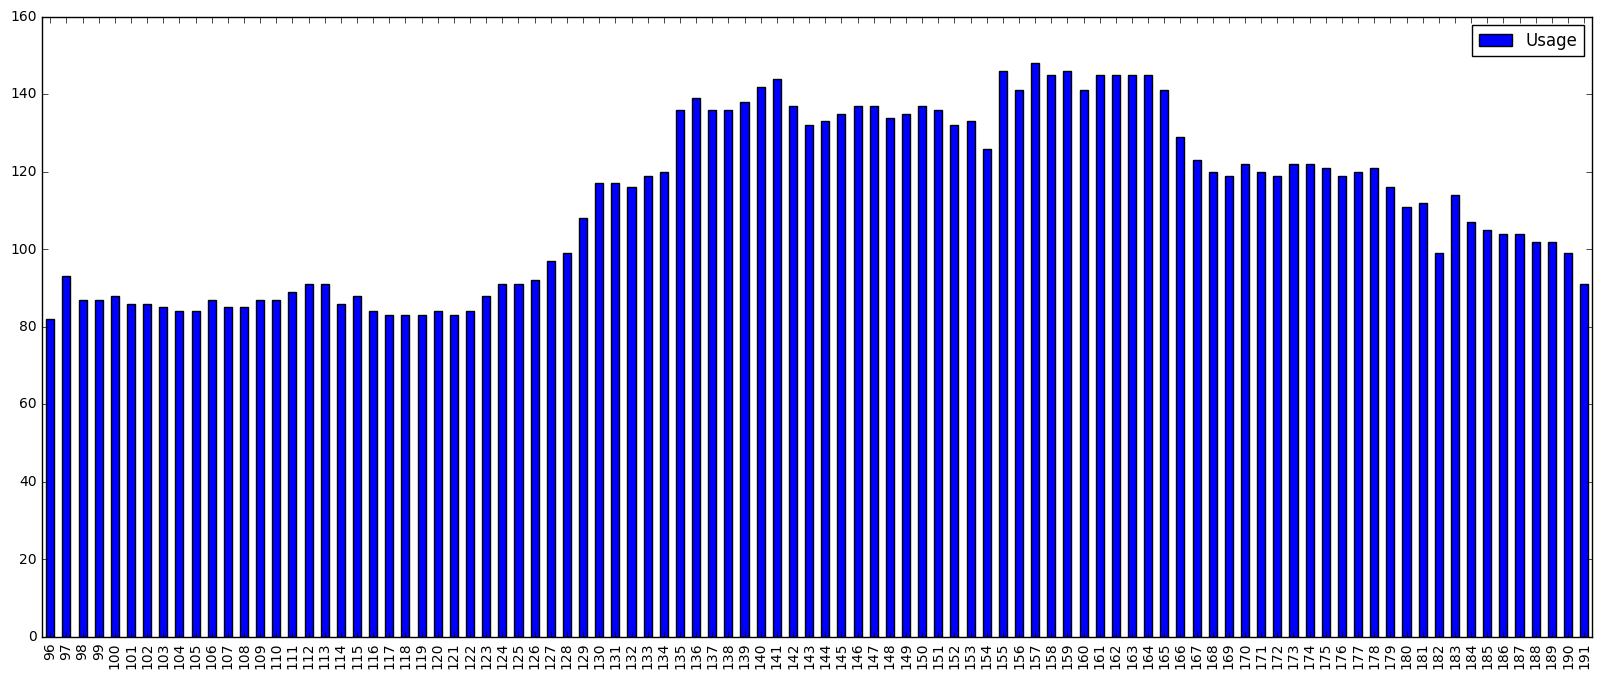

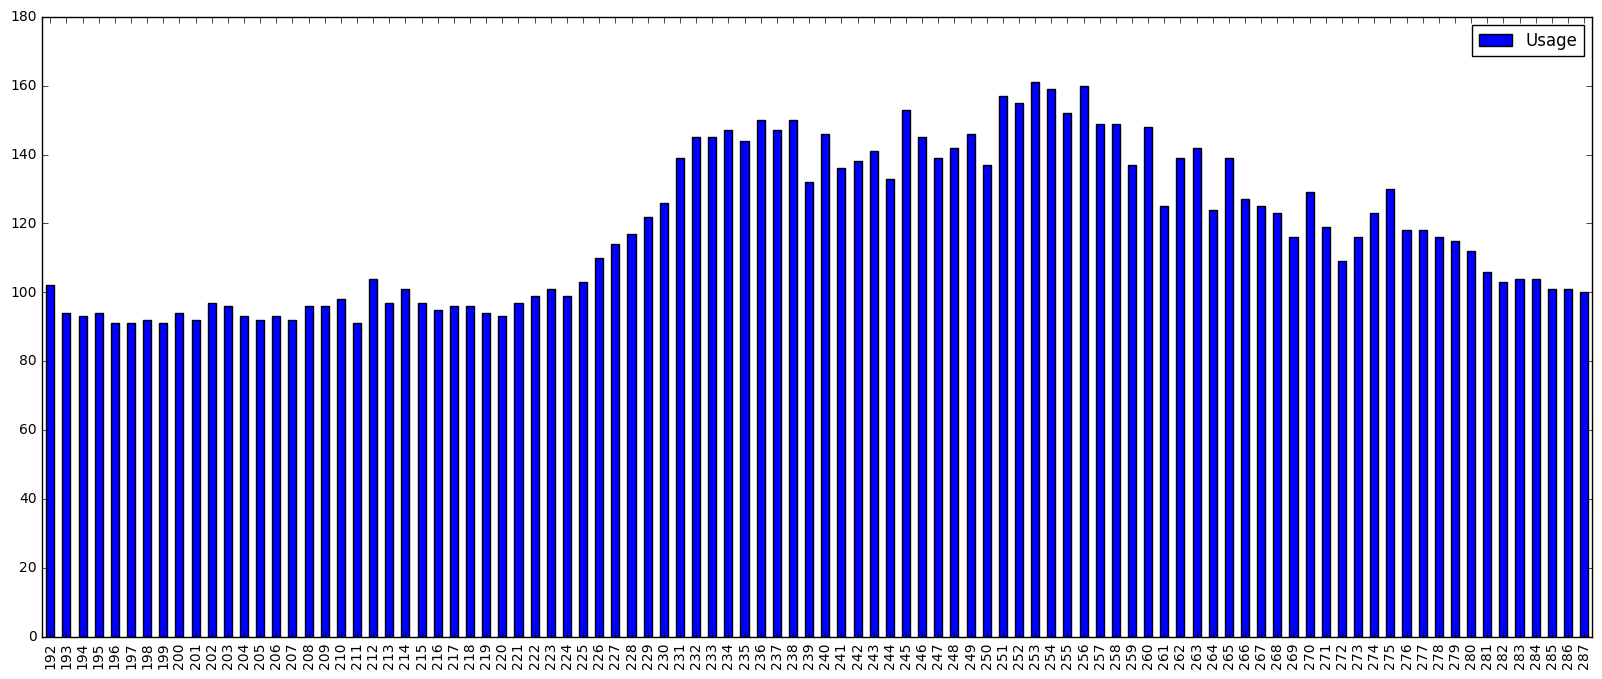

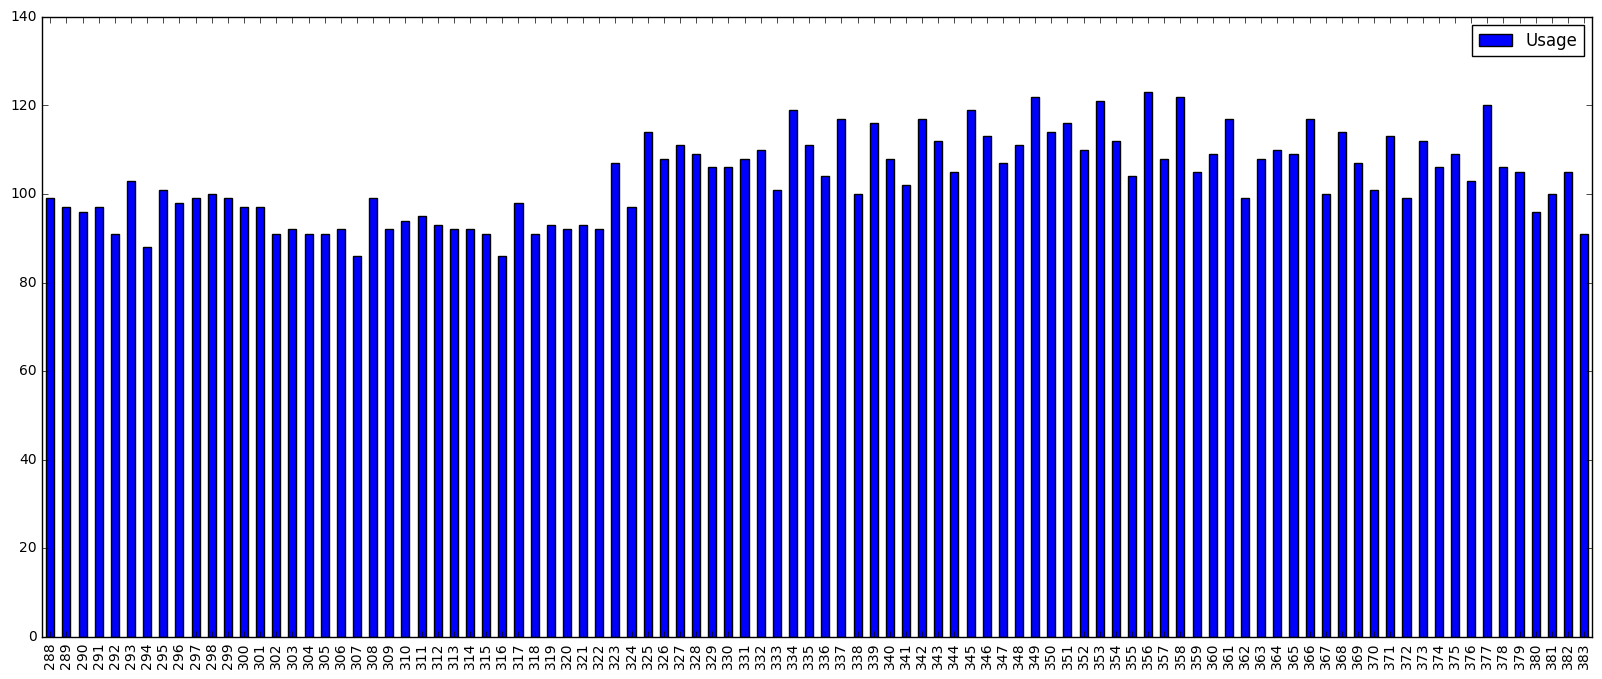

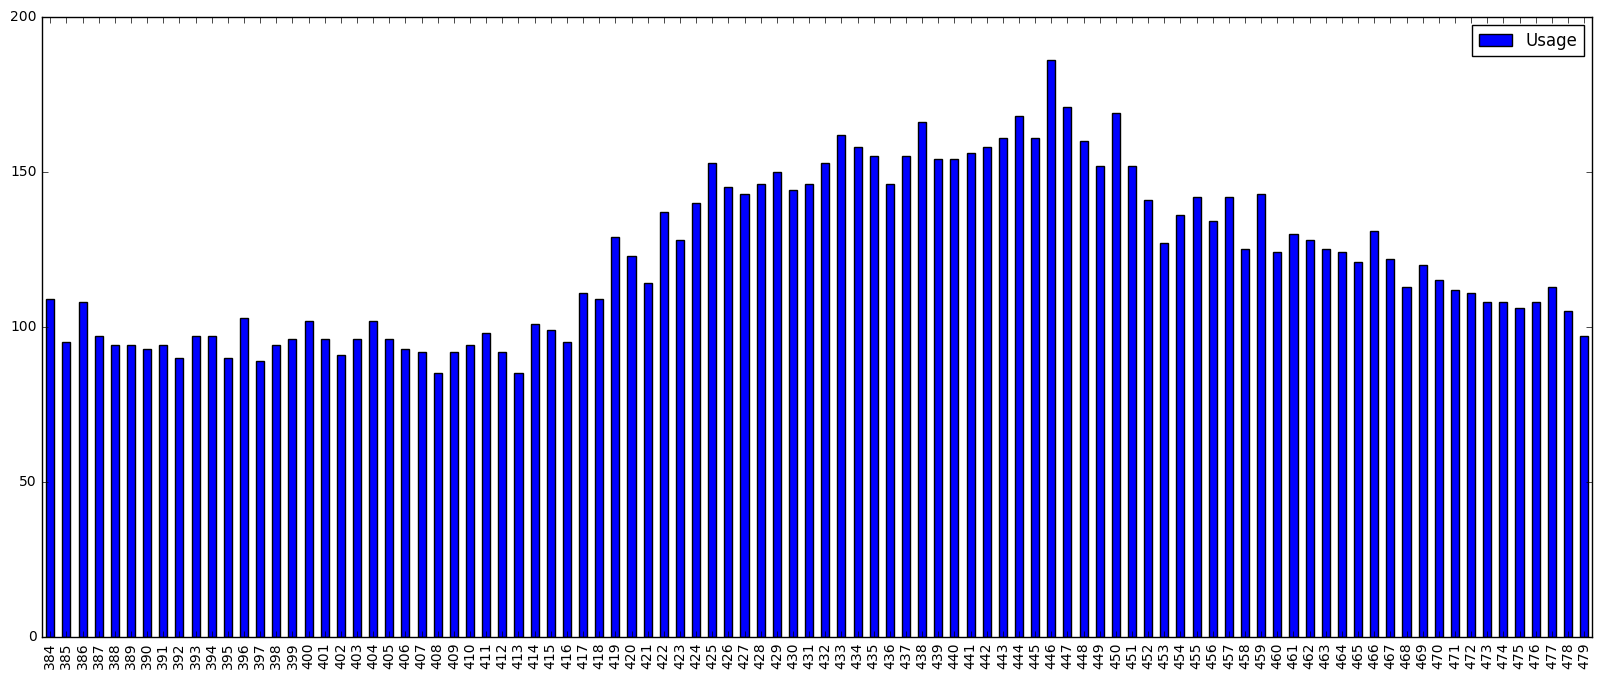

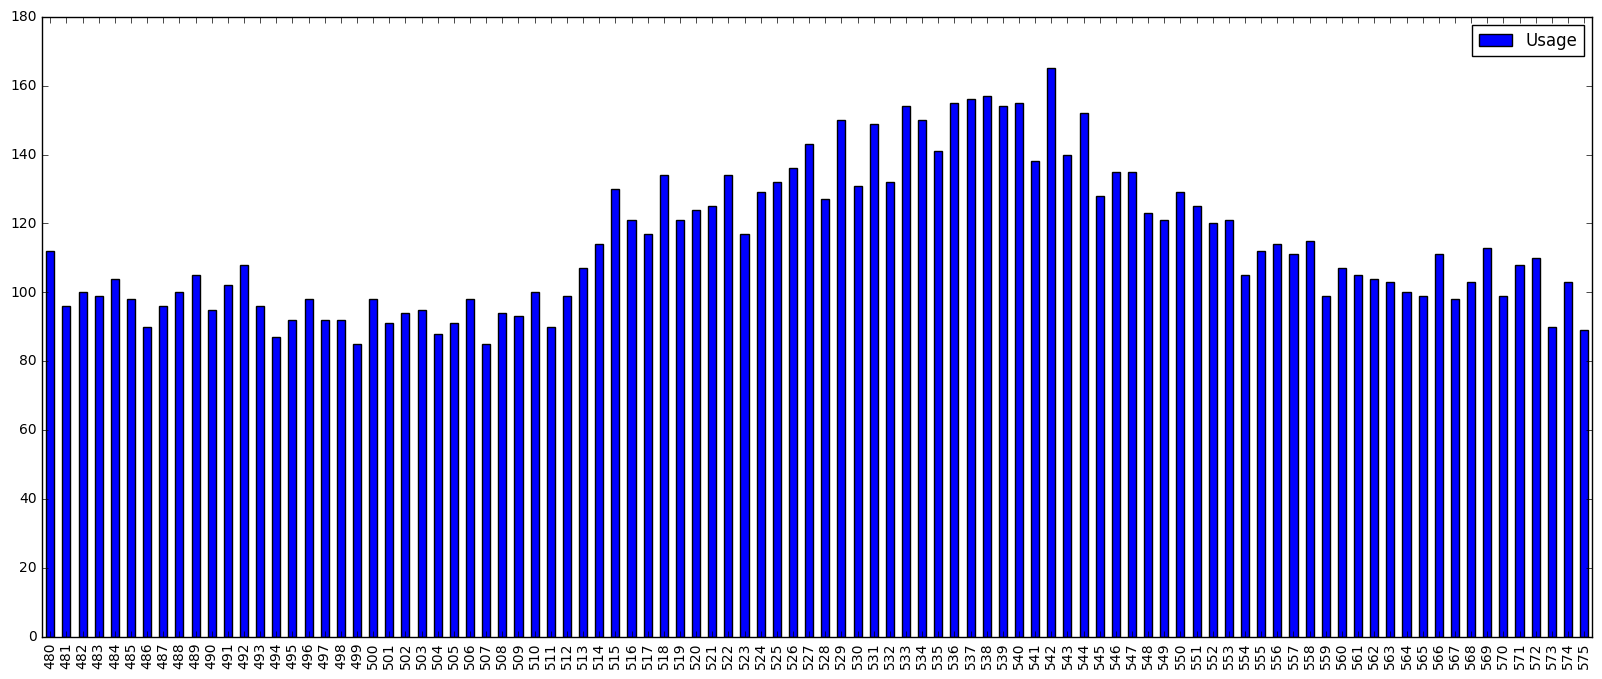

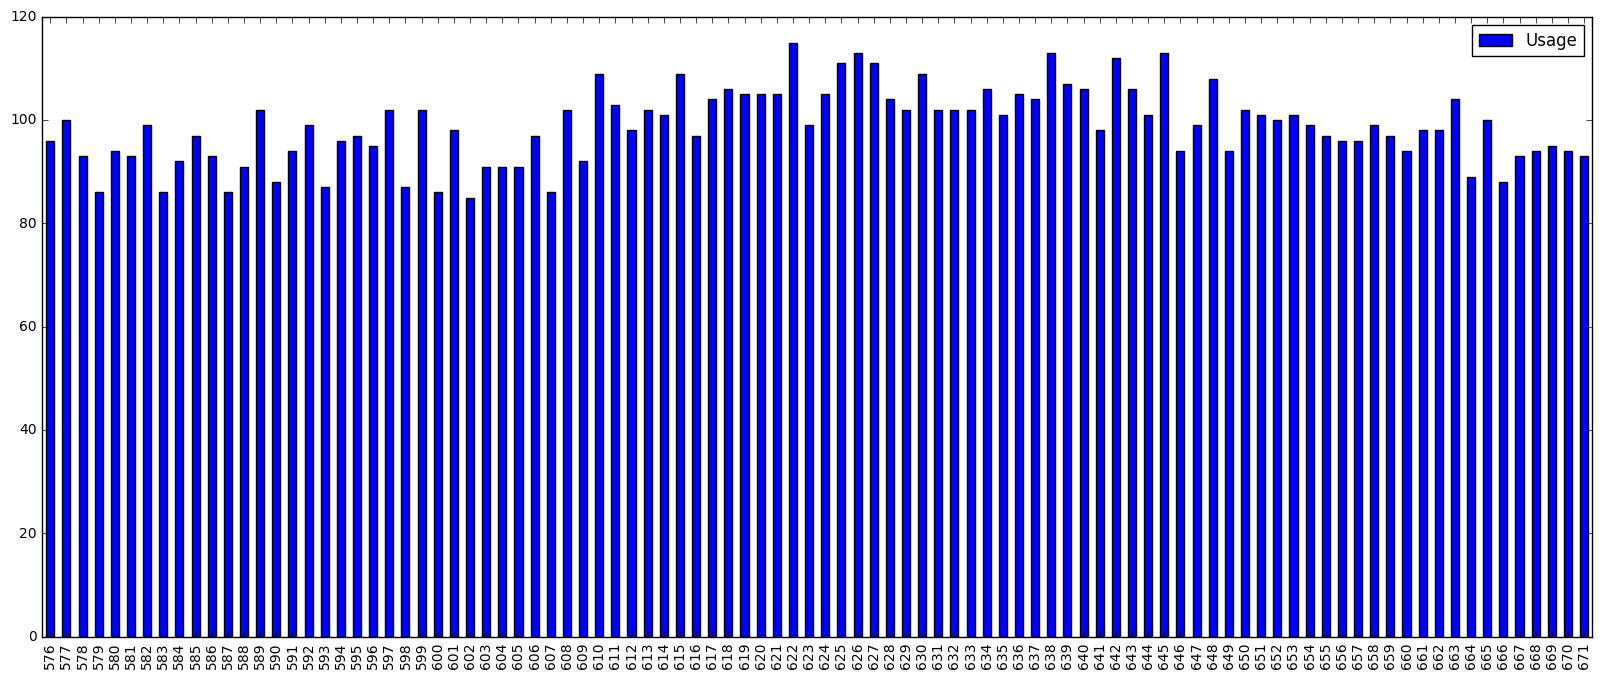

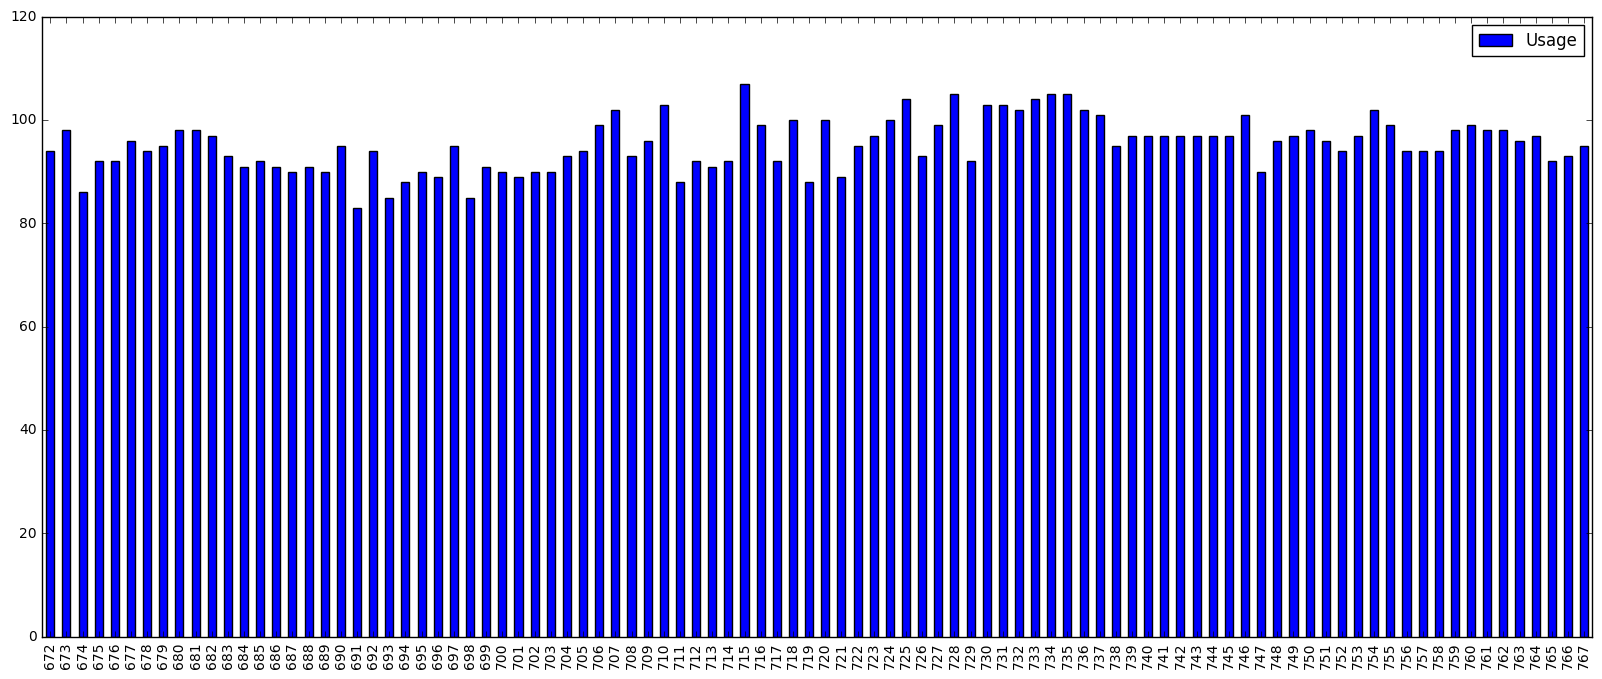

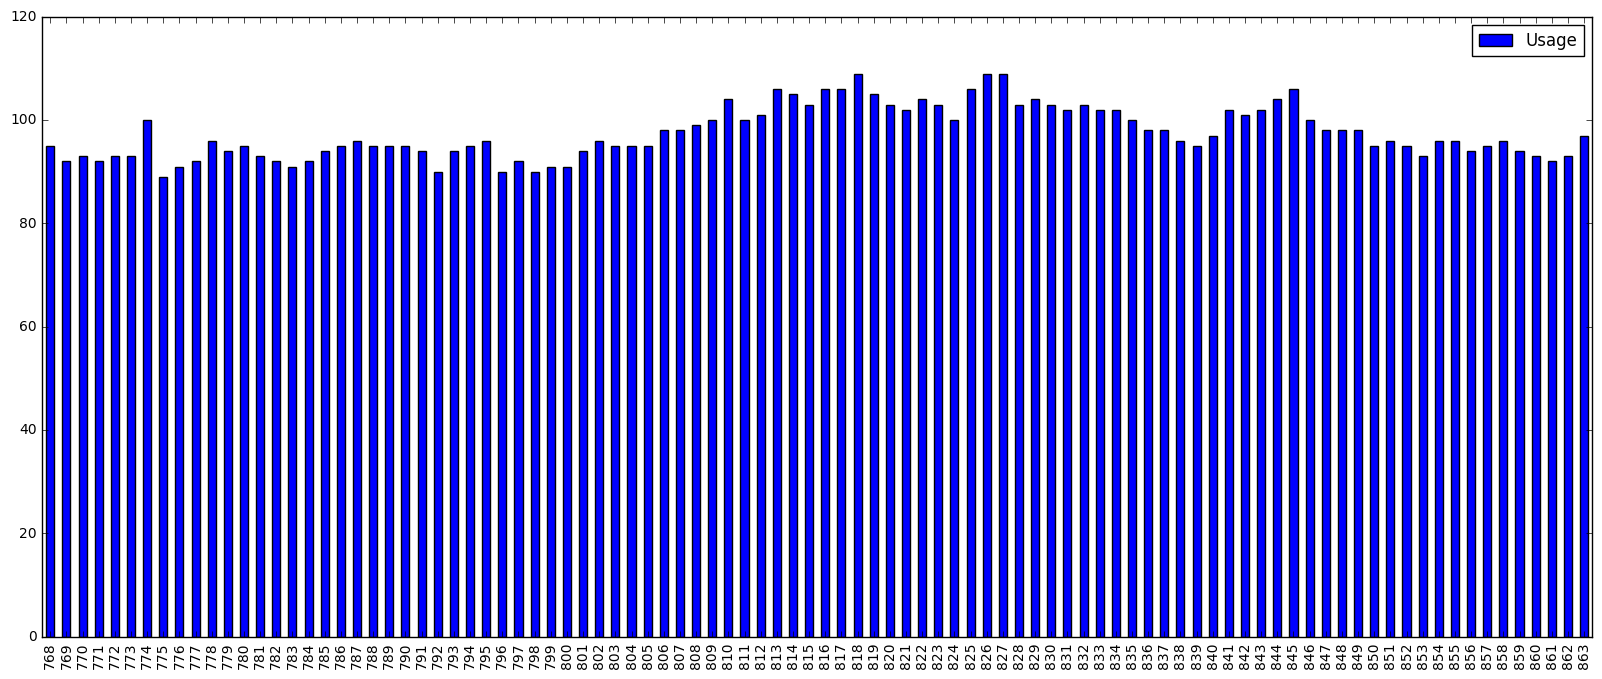

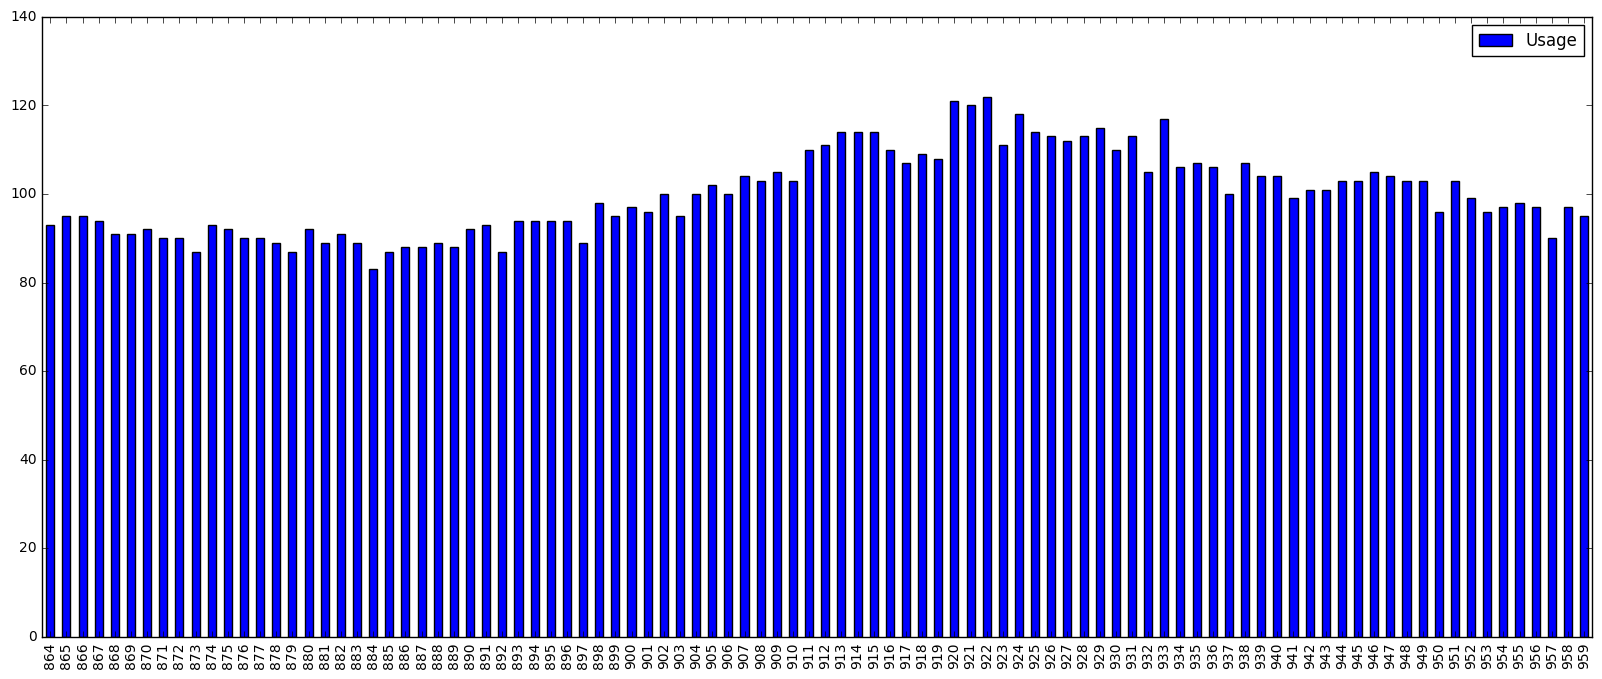

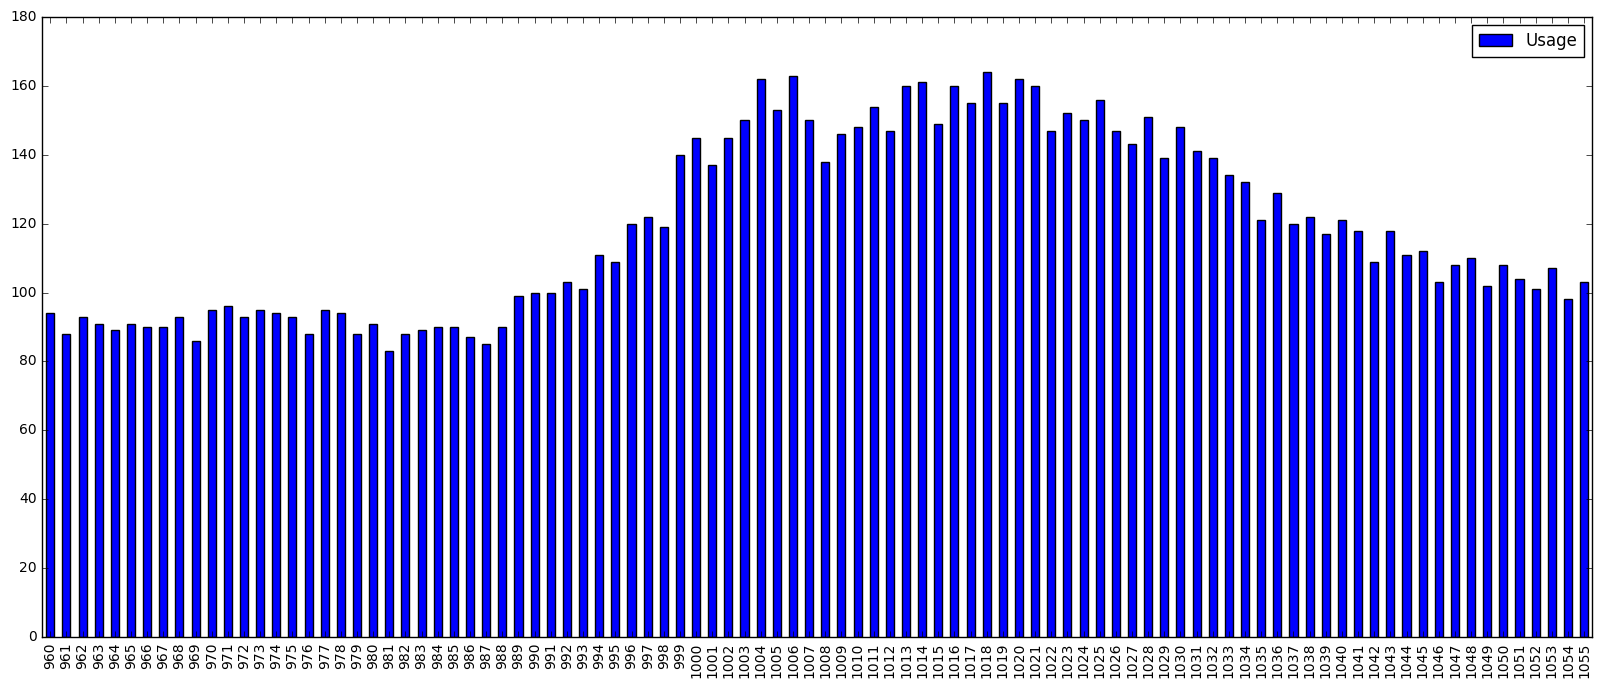

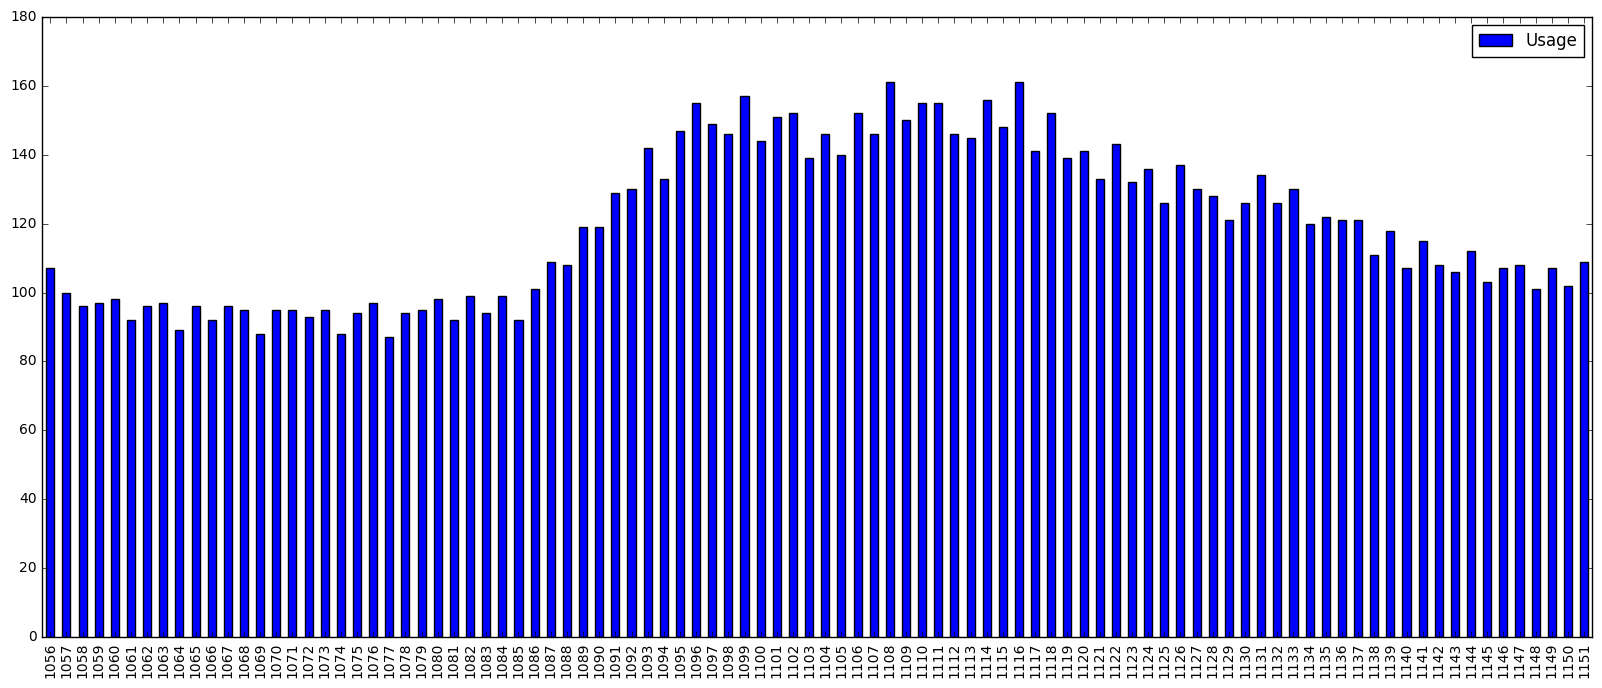

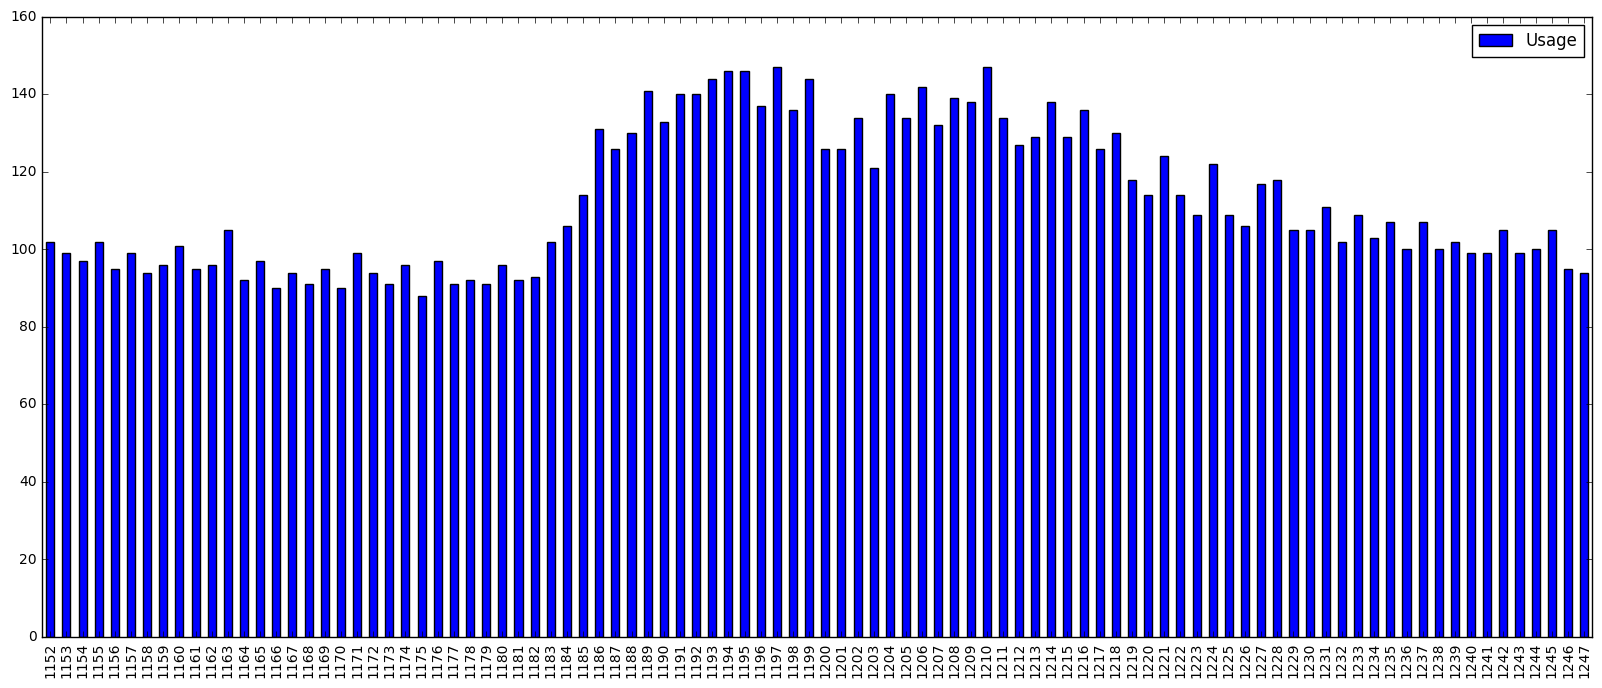

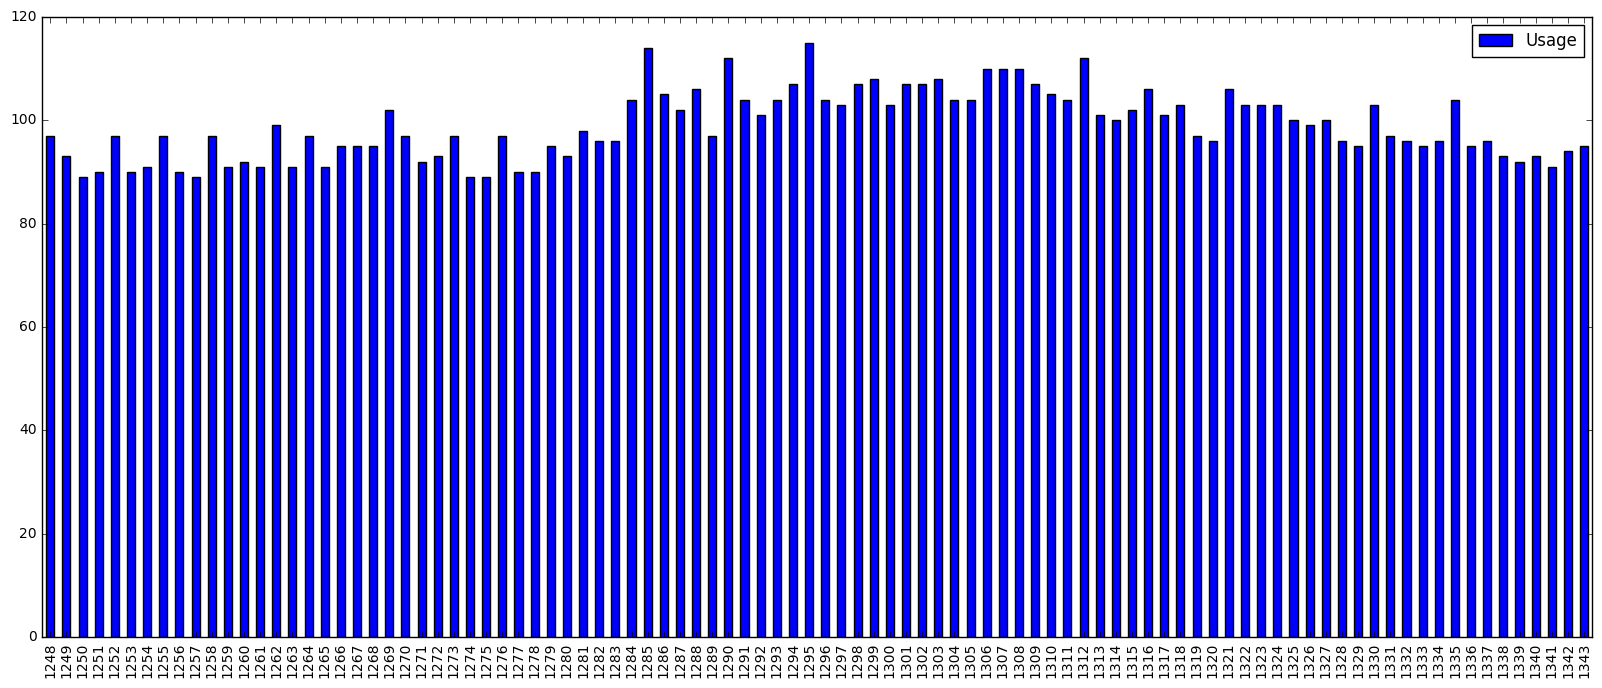

In [60]:
dfnew_byDay = newdf.groupby(['Date_Time'])
dfnew_byDay.plot.bar(stacked=True)

In [ ]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')

In [63]:
plt.bar( 
        #using df['pre_score'] data,
        dfnew_byDay.Usage, 
        # of width
#         width, 
        # with alpha 0.5
#         alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
#         label=dfnew_byDay['Date_Time'][0]
) 

TypeError: bar() missing 1 required positional argument: 'height'

In [64]:
?plt.bar

In [ ]:
''